 The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

# World Happiness Report

In [1]:
# Importing the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('happiness_score_dataset.csv')
data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
data.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [5]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309882,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [6]:
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

## Correlation

In [7]:
data.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


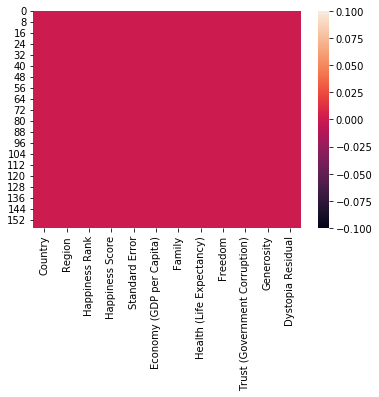

In [8]:
sns.heatmap(data.isnull()) 

# Data looks cleaning, no missing values present in the dataset

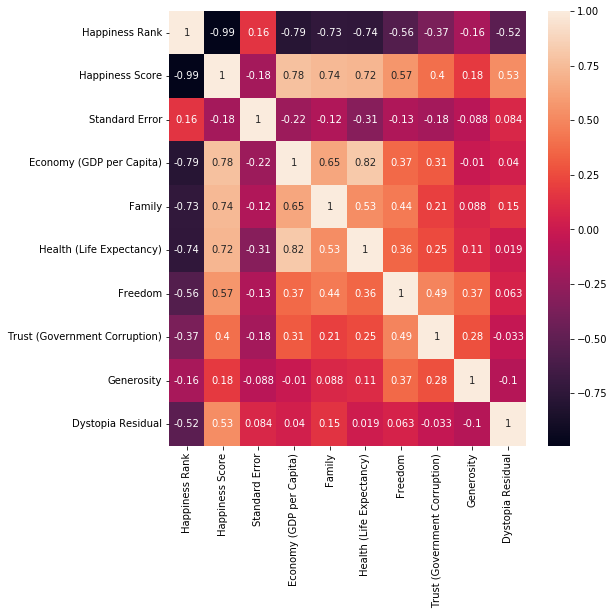

In [9]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True)

## Checking Outliers in the dataset

Happiness Rank                       AxesSubplot(0.125,0.71587;0.227941x0.16413)
Happiness Score                   AxesSubplot(0.398529,0.71587;0.227941x0.16413)
Standard Error                    AxesSubplot(0.672059,0.71587;0.227941x0.16413)
Economy (GDP per Capita)            AxesSubplot(0.125,0.518913;0.227941x0.16413)
Family                           AxesSubplot(0.398529,0.518913;0.227941x0.16413)
Health (Life Expectancy)         AxesSubplot(0.672059,0.518913;0.227941x0.16413)
Freedom                             AxesSubplot(0.125,0.321957;0.227941x0.16413)
Trust (Government Corruption)    AxesSubplot(0.398529,0.321957;0.227941x0.16413)
Generosity                       AxesSubplot(0.672059,0.321957;0.227941x0.16413)
Dystopia Residual                      AxesSubplot(0.125,0.125;0.227941x0.16413)
dtype: object

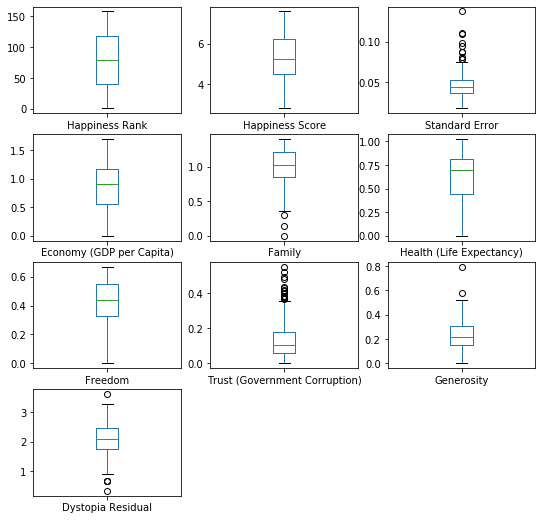

In [10]:
data.plot(kind='box', subplots=True, figsize=(9,9), layout=(4,3))

Outliers are presents in the dataset.

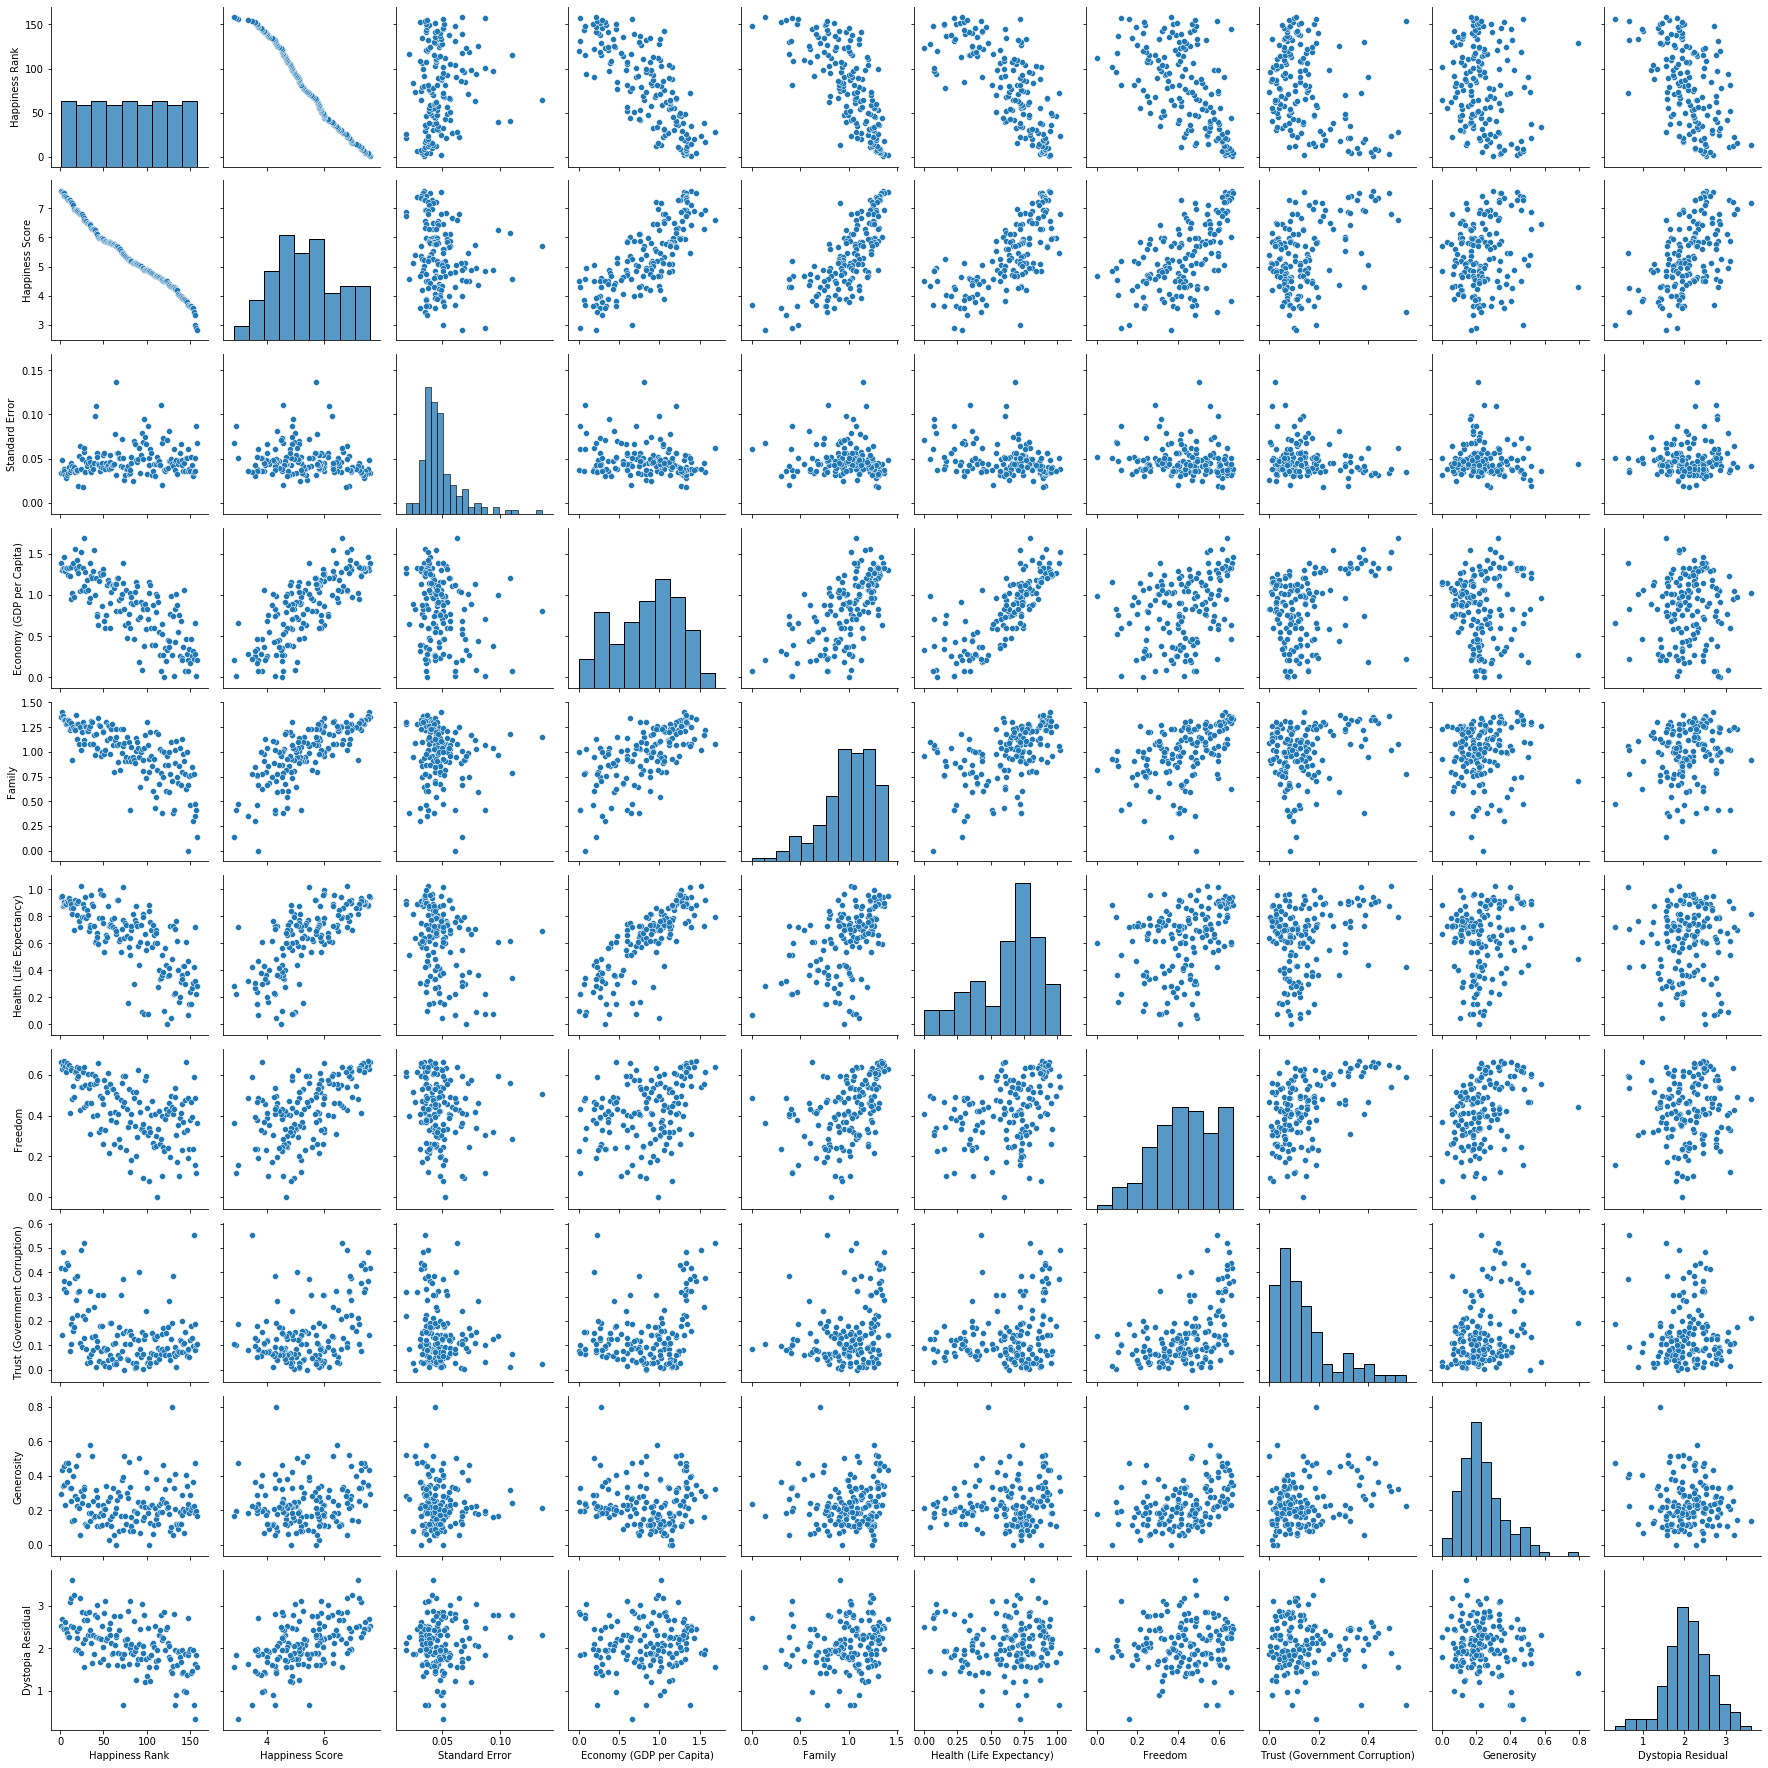

In [11]:
sns.pairplot(data)

In [12]:
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

### Skewness in data

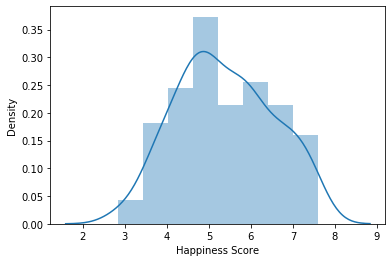

In [13]:
sns.distplot(data['Happiness Score'])

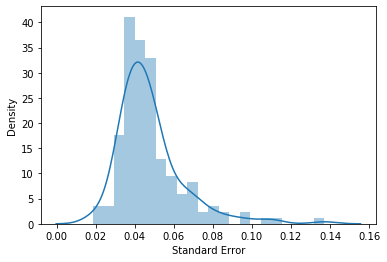

In [14]:
sns.distplot(data['Standard Error'])

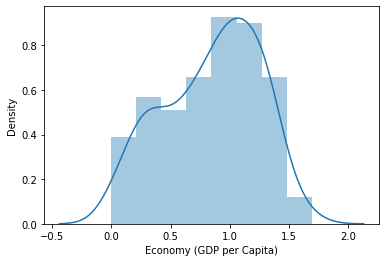

In [15]:
sns.distplot(data['Economy (GDP per Capita)'])

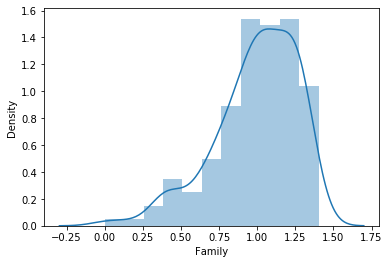

In [16]:
sns.distplot(data['Family'])

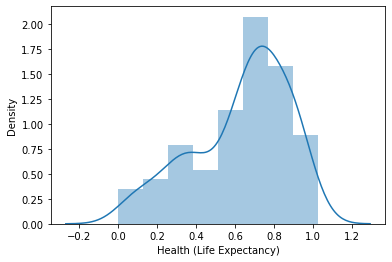

In [17]:
sns.distplot(data['Health (Life Expectancy)'])

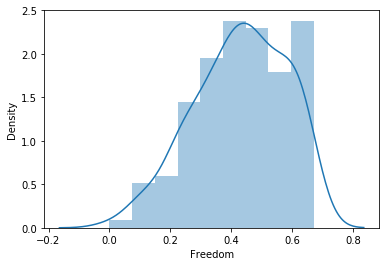

In [18]:
sns.distplot(data['Freedom'])

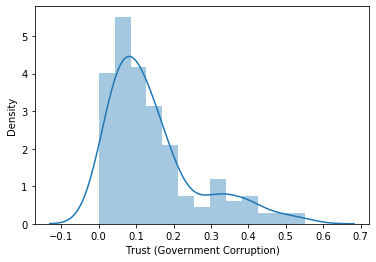

In [19]:
sns.distplot(data['Trust (Government Corruption)'])

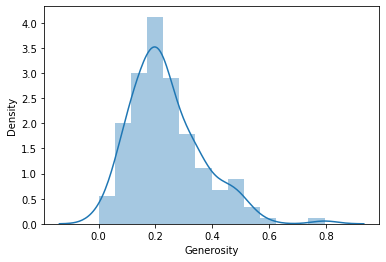

In [20]:
sns.distplot(data['Generosity'])

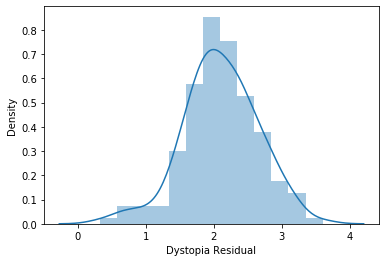

In [21]:
sns.distplot(data['Dystopia Residual'])

In [22]:
datatemp=data.drop(columns=['Region','Country'])  

## Removing Outliers

In [23]:
from scipy.stats import zscore

z=np.abs(zscore(datatemp))
z

array([[1.72099989, 1.93736005, 0.80592569, ..., 2.30965159, 0.47103971,
        0.75825809],
       [1.69907456, 1.91458063, 0.05588945, ..., 0.01647953, 1.57585637,
        1.09285682],
       [1.67714922, 1.88479215, 0.8544869 , ..., 2.8427738 , 0.8242928 ,
        0.71233526],
       ...,
       [1.67742676, 2.0761992 , 0.13253425, ..., 0.38141902, 1.85689094,
        3.20843049],
       [1.69935209, 2.1646885 , 2.26396166, ..., 0.35771452, 0.31694987,
        0.48198451],
       [1.72127743, 2.22251319, 1.13418227, ..., 0.30180313, 0.5581534 ,
        0.96361241]])

In [24]:
threshold=3
print(np.where(z>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([7, 2, 2, 2, 8, 4, 7, 9, 4], dtype=int64))


In [25]:
z[40][1]

0.6941291898587154

In [26]:
z[2][0]

1.6771492249374222

In [27]:
datatemp.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [28]:
len(np.where(z>3)[0])

9

In [29]:
type(z)

numpy.ndarray

In [30]:
datatemp.iloc[115]

Happiness Rank                   116.00000
Happiness Score                    4.57100
Standard Error                     0.11068
Economy (GDP per Capita)           0.07120
Family                             0.78968
Health (Life Expectancy)           0.34201
Freedom                            0.28531
Trust (Government Corruption)      0.06232
Generosity                         0.24362
Dystopia Residual                  2.77729
Name: 115, dtype: float64

In [31]:
datatemp.drop([ 27,  40,  64, 115, 128, 147, 153, 155, 157],axis=0)

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
150,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [32]:
df_new=datatemp[(z<3).all(axis=1)]

In [33]:
df_new.shape

(149, 10)

In [34]:
datatemp.shape

(158, 10)

In [35]:
total_drop=datatemp.shape[0]-df_new.shape[0]
total_drop

9

In [36]:

x=df_new.drop(columns='Dystopia Residual')
x

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...,...,...
150,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165
151,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747
152,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510
154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260


In [37]:
y=df_new['Dystopia Residual']
y

0      2.51738
1      2.70201
2      2.49204
3      2.46531
4      2.45176
        ...   
150    1.41723
151    1.46494
152    1.95210
154    1.63328
156    1.83302
Name: Dystopia Residual, Length: 149, dtype: float64

In [38]:
# Standardized the data
sc=StandardScaler()
scaled=sc.fit_transform(x)
print(scaled)

[[-1.71390512  1.94794451 -0.86678606 ...  1.58370387  2.47225453
   0.54630526]
 [-1.69153548  1.92446866  0.18566863 ...  1.33895344  0.00924715
   1.71389767]
 [-1.66916583  1.89376946 -0.92608935 ...  1.47602698  3.03674718
   0.91963022]
 ...
 [ 1.68628086 -1.67456049 -1.10042671 ... -1.28566246 -0.38241996
   1.11805063]
 [ 1.73102015 -1.8867461  -0.69173419 ...  0.37943861 -0.53365337
  -0.40922585]
 [ 1.77575944 -2.27951521  2.88218185 ... -2.0547641  -0.35206708
  -0.28645792]]


In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=45)

In [40]:
x_train.shape

(99, 9)

In [41]:
x_test.shape

(50, 9)

In [42]:
y_train.shape

(99,)

In [43]:
y_test.shape

(50,)

In [44]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [45]:
lr.coef_

array([ 9.42616496e-06,  1.00036840e+00, -6.76975409e-04, -1.00008228e+00,
       -9.99953514e-01, -9.99781348e-01, -9.99638304e-01, -1.00034733e+00,
       -1.00021984e+00])

In [46]:
lr.intercept_

-0.0028381300292061873

In [47]:
lr.score(x_train,y_train)

0.9999997056486906

In [48]:
pred=lr.predict(x_test)
print(pred)

[2.51754663 1.68427063 0.89957334 2.46520897 2.12380206 2.22003689
 2.79065935 2.20801329 1.75886278 0.9817519  2.8360268  1.95845847
 2.2755162  2.11359359 1.79312451 1.64834638 1.41712062 1.85111935
 2.74275107 2.10988479 1.26502959 1.62261048 2.24183308 2.24710202
 2.4519052  2.44225781 1.89862883 2.43245688 3.0889984  3.0511666
 2.00076369 2.12514776 0.99851591 1.24123722 2.11562176 1.44422472
 3.60195919 2.67619483 2.89317299 2.3212901  2.4385145  1.93115329
 2.70227079 1.6162099  2.06396848 2.47494148 1.92345183 1.59860638
 1.57174731 1.87653935]


In [49]:
print("Predicted value\n",pred,"\n")
print("Actual Value\n",y_test)

Predicted value
 [2.51754663 1.68427063 0.89957334 2.46520897 2.12380206 2.22003689
 2.79065935 2.20801329 1.75886278 0.9817519  2.8360268  1.95845847
 2.2755162  2.11359359 1.79312451 1.64834638 1.41712062 1.85111935
 2.74275107 2.10988479 1.26502959 1.62261048 2.24183308 2.24710202
 2.4519052  2.44225781 1.89862883 2.43245688 3.0889984  3.0511666
 2.00076369 2.12514776 0.99851591 1.24123722 2.11562176 1.44422472
 3.60195919 2.67619483 2.89317299 2.3212901  2.4385145  1.93115329
 2.70227079 1.6162099  2.06396848 2.47494148 1.92345183 1.59860638
 1.57174731 1.87653935] 

Actual Value
 0      2.51738
45     1.68435
133    0.89991
3      2.46531
35     2.12367
46     2.21978
39     2.79094
117    2.20857
126    1.75873
144    0.98195
29     2.83600
139    1.95812
116    2.27513
105    2.11399
137    1.79293
36     1.64880
150    1.41723
146    1.85100
42     2.74255
90     2.11032
87     1.26462
88     1.62215
118    2.24173
53     2.24729
4      2.45176
114    2.44191
94     1.89894
67 

In [50]:
from sklearn.metrics import r2_score

In [51]:
print(r2_score(pred,y_test))

0.999999732389667


0.99 is the happiness score